## Final Project Submission

Please fill out:
* Student name: Solphine Joseph
* Student pace:Hybrid
* Scheduled project review date/time: 
* Instructor name: Nikita/Diana
* Blog post URL:


                     
## BUSINESS UNDERSTANDING 
INTRODUCTION

Microsoft company is a leading company in technology that develops a wide range of software,services and devices.However the company has not yet ventured into movie production .This project aims at coming up with analyis of various factors that will provide the stakeholders of the company with real_time based analysis of what to consider before launching into movie production space.Some of the factors to be analyzed include:

- Studios that are the best based on numbers of movies produced

- The top genres that are leading in the successful movie  studios

- Analyze the relationship between the total gross  and the leadings studios 

- Perform an analysis that identifies the top performing directors 



OBJECTIVES 

- To help microsoft leverage the data analysis carried out in order to identify some of their key competitors in the market

- To identify the genres that are top perfoming in the successful studios

- To ensure the company is making profit at the end of the day


           

####

## DATA UNDERSTANDING 
Data required in this project is sourced from the sites below.

1 https://www.imdb.com/
 
2 https://www.boxofficemojo.com/date/?ref_=bo_nb_shs_tab

3 https://www.rottentomatoes.com/

4 https://www.themoviedb.org/
          
5 https://www.the-numbers.com/'


     ERD diagram of IMDB database

![Alt text](iC:\Users\admin\OneDrive\Documents\Flatiron\phase1_project\MICROSOFT-MOVIE-STUDIO-PROJECT\movie_data_erd.jpeg)




The data has been compiled from the internet and compressed to a folder that gives access to all required information.This data was preffered since it is up to date.

## METHODOLOGY

The methodology seeks to show the data cleaning and analysis procedures in this project.


In [50]:
#Import relevant libraries and connect to SQlite Database
import pandas as pd
import csv
import sqlite3
import matplotlib.pyplot as plt



1. READING THE DATA

In [51]:
#Read  movie_gross data and put it in a dataframe defined gross_data
gross_data=pd.read_csv('zippedData/bom.movie_gross.csv.gz')


In [52]:
#Read and extract imdb dzip file  into destination directory
import zipfile
# Specify the path to the zip file
zip_file_path = 'zippedData\im.db.zip'
# Open the zip file for reading
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#Extract the files to a directory
  zip_ref.extractall('destination_directory') 


In [53]:
#connect to the Database in destination_directory

# Specify the path to the SQLite database file
db_file_path = 'destination_directory/im.db'

# Connect destination_directoryto the SQLite database
connection = sqlite3.connect(db_file_path)

# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Now you can execute SQL queries using the cursor
# For example, you can fetch data from a table
##cursor.execute('SELECT * FROM your_table_name')

# Fetch the results of the query
#rows = cursor.fetchall()

# Print the results
#for row in rows:
   # print(row)

# Don't forget to close the cursor and the connection when you're done
#cursor.close()
#connection.close()


     1.1 Successful studios in relation to the gross proceeds

This process entails cleaning the movie gross data that is crucial in understanding which companies are doing well in relation to the their gross  income and conduct some analysis as well


        1.1.1 
        Cleaning the Data

In [54]:
# Display data from BOM that shows the bom.movie_gross proceeds 
gross_data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [55]:
# Clean the data :Replace the null values in foreign gross and domestic_grosss columns
# Check 'foreign_gross'column  Before Modification
before_foreign_nulls = gross_data['foreign_gross'].isnull().sum()
before_domestic_nulls = gross_data['domestic_gross'].isnull().sum()

#Replace the null values
gross_data['foreign_gross'].fillna(0, inplace=True)
gross_data['domestic_gross'].fillna(0, inplace=True)

# Check 'foreign_gross'column  After Modification
after_foreign_nulls = gross_data['foreign_gross'].isnull().sum()
after_domestic_nulls = gross_data['domestic_gross'].isnull().sum()



In [56]:
#show the datatypes in the different columns
print(gross_data.dtypes)

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


In [57]:
#Change the foreign_gross datatype to float 
# Check the current data type of 'foreign_gross' column before modification
before_dtype = gross_data['foreign_gross'].dtype

# Run the Code
gross_data.replace(',','', regex=True, inplace=True)
gross_data['foreign_gross']=gross_data['foreign_gross'].astype(float)

#check the data type of 'foreign_gross' column after modification
after_dtype = gross_data['foreign_gross'].dtype
after_dtype

#assert the changes made
assert after_dtype == float, "The data type of 'foreign_gross' column was not changed to float."



1.1. 2  
Exploratory Data Analysis of BOM Data



In [58]:
#To resolve the type error that comes about when adding the domestic and foreign gross values
# Convert any non-numeric values to NaN in 'domestic_gross' and 'foreign_gross' columns
gross_data['domestic_gross'] = pd.to_numeric(gross_data['domestic_gross'], errors='coerce')
gross_data['foreign_gross'] = pd.to_numeric(gross_data['foreign_gross'], errors='coerce')

# Add a column to show total gross income
gross_data['total_gross'] = gross_data['domestic_gross'] + gross_data['foreign_gross']

# Convert the values in the 'total_gross' column to int64
gross_data['total_gross'] = gross_data['total_gross'].astype('int64')

# Display the 'total_gross' column
print(gross_data['total_gross'])


0       1067000000
1       1025500000
2        960300000
3        828300000
4        752600000
           ...    
3382          6200
3383          4800
3384          2500
3385          2400
3386          1700
Name: total_gross, Length: 3387, dtype: int64


In [59]:
# Determine how many movies each studio has produced
prd_movies =gross_data['studio'].value_counts()
# convert the ouput to a dataframe
df_prd_movies = gross_data['studio'].value_counts()
df_prd_movies = pd.DataFrame(prd_movies)
df_prd_movies = df_prd_movies.reset_index()
df_prd_movies.columns = ['studio_name', 'total_movies_produced']
df_prd_movies

,studio_name,total_movies_produced
0,IFC,166
1,Uni.,147
2,WB,140
3,Fox,136
4,Magn.,136
...,...,...
252,E1,1
253,PI,1
254,ELS,1
255,PalT,1


- The above code indicates that most of the movies are produced by the' IFC' studios followed by Uni
WB,Fox and Magn.
- Our interest is also to find out how this top perfoming studios are doing in terms of the gross they receive.

In [60]:
#group the data using the studios and their total gross
grouped=gross_data.groupby('studio').sum('total_gross')
grouped


,domestic_gross,foreign_gross,year,total_gross
studio,,,,
3D,6100000.0,9900000.0,2010,16000000
A23,164200.0,0.0,4024,164200
A24,324194200.0,238462200.0,98754,562656400
ADC,248200.0,0.0,4032,248200
AF,2142900.0,3500000.0,12080,5642900
...,...,...,...,...
XL,458000.0,0.0,4027,458000
YFG,1100000.0,0.0,2016,1100000
Yash,31631400.0,272825100.0,28194,304456500


In [61]:
# Create a new dataframe by joining the gross_data dataframe with the df_prd_movies dataframe
joined=grouped.join(df_prd_movies.set_index("studio_name"))
joined=joined.drop('year', axis=1)
joined['avg_gross']=joined['total_gross']/joined['total_movies_produced']

# Change data type to integer
joined=joined.astype('int64')

# Sort the new dataframe by avg_gross
joined.sort_values('avg_gross', ascending=False)

,domestic_gross,foreign_gross,total_gross,total_movies_produced,avg_gross
studio,,,,,
HC,2700000,867600000,870300000,1,870300000
P/DW,1682900000,3393600000,5076500000,10,507650000
BV,18419029199,25793854700,44212883898,106,417102678
GrtIndia,20200000,234000000,254200000,1,254200000
WB (NL),3995699999,6339000000,10334699999,45,229659999
...,...,...,...,...,...
BSM,5100,0,5100,1,5100
TAFC,4600,0,4600,1,4600
Hiber,3600,0,3600,1,3600


The code above sorts the dataframe starting with the studio with the highest average gross to that with the lowest average gross.
As per the above analysis most studios have produces less that 10 movies and the BV studio has produced 106 mmovies.
For comprehensive analysis filter the data to obtain studios with more than 50 movies produced in relation to the average gross.

In [71]:
# Create another table showing only the studios that have released 50 or more movies
joined2=joined.drop(joined[joined['total_movies_produced']<50].index)

# Sort the new dataframe by avg_gross
joined2=joined2.sort_values(by='avg_gross', ascending=False)
joined2



,domestic_gross,foreign_gross,total_gross,total_movies_produced,avg_gross
studio,,,,,
BV,18419029199,25793854700,44212883898,106,417102678
Fox,10949499997,20055866599,31005366596,136,227980636
WB,12168046000,18667902998,30835948998,140,220256778
Sony,8459683098,13945354998,22405038096,110,203682164
Uni.,12902393000,16854771191,29757164191,147,202429688
Par.,7685870699,11863384998,19549255697,101,193556987
LGF,4118963400,4482619300,8601582700,103,83510511
Wein.,1540550498,2624085999,4164636497,77,54086188
WGUSA,25394600,2761447000,2786841600,58,48048993


The most financially successful studio is BV, followed by Fox, WB, Sony, and Universal


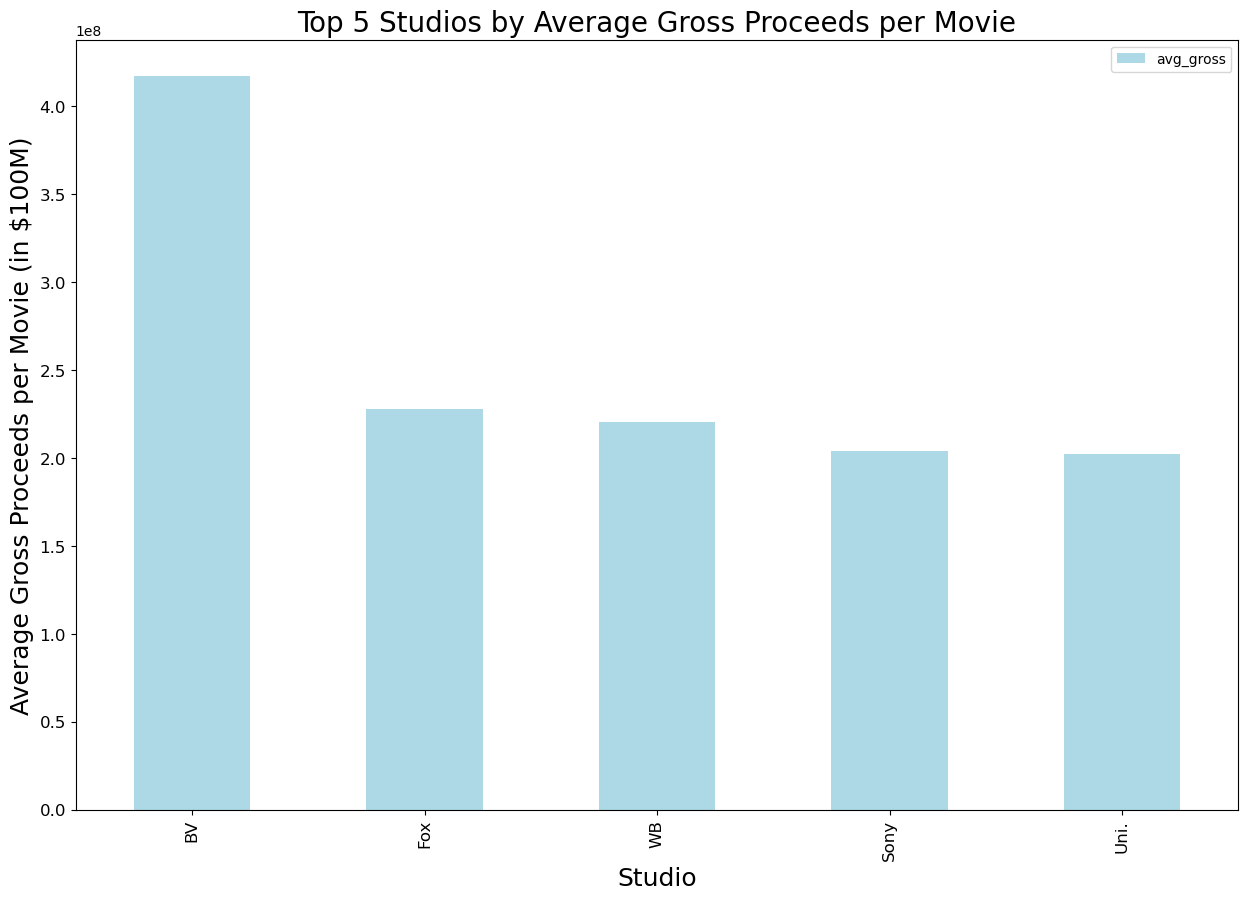

In [76]:
# Visualize the data
# show the top five prominent studios
studioplot= joined2.head().plot(y='avg_gross', fontsize=12, kind='bar', figsize=(15,10), color='lightblue')

# Set axes titles and font size for improved readability 
studioplot.set_title("Top 5 Studios by Average Gross Proceeds per Movie", fontsize=20)
studioplot.set_ylabel("Average Gross Proceeds per Movie (in $100M)", fontsize=18)
studioplot.set_xlabel("Studio", fontsize=18)
print("The most financially successful studio is BV, followed by Fox, WB, Sony, and Universal")

Based on the analysis ,the top five studios that have both their average gross on  the high as well as the number of their productions are :BV, Fox, WB,Sony and Universal studios.

## 2. Popular Genre in most Successful Movie Studio

Bv Studio is the top perfoming genre among the five top_perming studios.
An analysis on the genre that Bv studio produces oftenly would be crucial in determining the genre that microsoft should focus.
This is because the margin between the average gross of the Bv studio and its closest competitor Fox according to the bar graph is almost(2.0)* $100M.


In [79]:
# Create a dataframe of movies produced by BV studios, sorted by total_gross in descending order
bv_movies=gross_data[gross_data['studio']=='BV'].sort_values('total_gross', ascending=False)
bv_movies.head(20)

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1518900000
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1405400000
3080,Black Panther,BV,700100000.0,646900000.0,2018,1347000000
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1332600000
1127,Frozen,BV,400700000.0,875700000.0,2013,1276400000
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1263500000
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1242800000
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1214800000
2322,Captain America: Civil War,BV,408100000.0,745200000.0,2016,1153300000
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067000000


In [81]:
#Outline the top most movies of Bv as a list
top_bv_titles=list(gross_data[gross_data['studio']=='BV'].sort_values('total_gross', ascending=False).head(20)['title'])
top_bv_titles

["Marvel's The Avengers",
 'Avengers: Age of Ultron',
 'Black Panther',
 'Star Wars: The Last Jedi',
 'Frozen',
 'Beauty and the Beast (2017)',
 'Incredibles 2',
 'Iron Man 3',
 'Captain America: Civil War',
 'Toy Story 3',
 'Rogue One: A Star Wars Story',
 'Pirates of the Caribbean: On Stranger Tides',
 'Finding Dory',
 'Alice in Wonderland (2010)',
 'Zootopia',
 'The Jungle Book (2016)',
 'Star Wars: The Force Awakens',
 'Guardians of the Galaxy Vol. 2',
 'Inside Out',
 'Thor: Ragnarok']

In [87]:
# Use the list of BV movie titles to extract BV's top 20 financially successful movies from IMDB's database
# Look at the IMDB movie_basics table
# Exclude entries with null values
q1=pd.read_sql('''SELECT * FROM movie_basics WHERE primary_title IN ("Marvel's The Avengers",
 'Avengers: Age of Ultron',
 'Black Panther',
 'Star Wars: The Last Jedi',
 'Frozen',
 'Beauty and the Beast (2017)',
 'Incredibles 2',
 'Iron Man 3',
 'Captain America: Civil War',
 'Toy Story 3',
 'Rogue One: A Star Wars Story',
 'Pirates of the Caribbean: On Stranger Tides',
 'Finding Dory',
 'Alice in Wonderland (2010)',
 'Zootopia',
 'The Jungle Book (2016)',
 'Star Wars: The Force Awakens',
 'Guardians of the Galaxy Vol. 2',
 'Inside Out',
 'Thor: Ragnarok')
 AND runtime_minutes IS NOT NULL AND genres IS NOT NULL''',connection)


In [88]:
# Pass query1 into a dataframe for visualization 
df=pd.DataFrame(q1)

# Create a new sub dataframe that takes the unique genre combinations of BV movies and returns the frequency
bv_genres = df['genres'].value_counts()
df_bv_genres = pd.DataFrame(bv_genres)
df_bv_genres = df_bv_genres.reset_index()
df_bv_genres.columns = ['genres', 'count']
df_bv_genres

,genres,count
0,"Adventure,Animation,Comedy",5
1,"Action,Adventure,Sci-Fi",5
2,"Action,Adventure,Fantasy",2
3,"Action,Adventure,Comedy",2
4,"Adventure,Drama,Sport",1
5,"Fantasy,Romance",1
6,"Crime,Drama",1
7,Documentary,1
8,Family,1
9,"Biography,Documentary,History",1


The genres that have the highest frequency of the movie combinations are the (Adventure,Animation,comedy)&(Action,Adventure,Sci-Fi)